In [175]:
#1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [176]:
from sklearn.datasets import load_wine

In [177]:
wine=load_wine()
output=wine.target

In [178]:
df=pd.DataFrame(wine["data"],columns=wine["feature_names"])
df=pd.concat([df,pd.DataFrame(output)],axis=1)
df=df.rename(columns={0:"target"})

In [179]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [180]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [181]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [182]:
df.isnull().sum().sum()

0

In [183]:
df.duplicated().sum()

0

In [184]:
#3
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [185]:
df1=scaler.fit_transform(df)
df1=pd.DataFrame(df,columns=wine["feature_names"]+["target"])

In [186]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

In [187]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1:]

In [188]:
#4
from sklearn.model_selection import train_test_split


In [189]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)


In [190]:
#5
from sklearn.neighbors import KNeighborsClassifier


In [191]:
knn=KNeighborsClassifier(n_neighbors=5)

In [192]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [193]:
#6
pred = knn.predict(X_test)

In [194]:
#7
from sklearn.metrics import accuracy_score

In [195]:
print(accuracy_score(y_test,pred))

0.7407407407407407


In [196]:
#8
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(accuracy_score(y_test,pred))


0.7222222222222222


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [197]:
#8
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(accuracy_score(y_test,pred))


0.7407407407407407


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [198]:
#8
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(accuracy_score(y_test,pred))


0.7037037037037037


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [199]:
#8
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(accuracy_score(y_test,pred))


0.7962962962962963


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [207]:
#9
n_neighbors=[1,2,3,4,5,6,7,8,9,10,11]
l=[]
for i in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred=knn.predict(X_test)
  accuracy=(accuracy_score(y_test,pred))
  l.append(accuracy)





/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[0.7962962962962963,
 0.7037037037037037,
 0.7407407407407407,
 0.7222222222222222,
 0.7407407407407407,
 0.7037037037037037,
 0.7592592592592593,
 0.7222222222222222,
 0.7222222222222222,
 0.7407407407407407,
 0.7407407407407407]

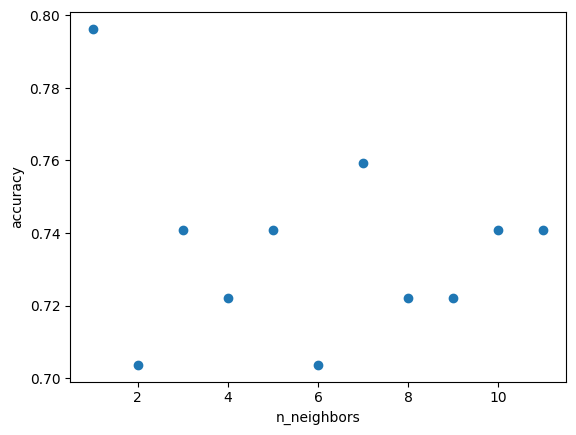

In [210]:
plt.scatter(x=n_neighbors,y=l)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

In [211]:
#10
#With the changing value of n-neighbors ,we can see the changing accuracy